In [ ]:
import numpy as np

import pandas as pd

## 객체생성

In [ ]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])

s


0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

- datetime 인덱스를 사용하여 NumPy 배열을 전달하여 데이터 프레임 생성

In [ ]:
dates = pd.date_range("20130101", periods=6)

dates

df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))

df

,A,B,C,D
2013-01-01,1.404601,0.866860,-1.347716,0.642584
2013-01-02,-0.040091,1.352475,-0.499470,0.547160
2013-01-03,-1.345897,0.649373,0.440263,-0.160134
2013-01-04,-0.353913,1.310887,1.183716,1.150467
2013-01-05,-0.925224,-0.421345,-0.369433,-1.023923
2013-01-06,-0.925500,0.183953,2.323404,0.313279


- 직렬 구조로 변환할 수 있는 객체의 사전을 전달하여 데이터 프레임 만들기

In [ ]:
df2 = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20130102"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    }
)


df2


,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


- 결과 데이터 프레임의 열은 dtype이 다릅니다

In [ ]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

- IPython을 사용하는 경우 열 이름 및 공용 속성에 대한 탭 완성이 자동으로 사용 가능합니다

In [ ]:
df2.<TAB>

SyntaxError: ignored

# 데이터 보기
- DataFrame.head() 및 DataFrame.tail()을 사용하여 프레임의 상단 행과 하단 행을 각각 확인합니다

In [ ]:
df.head()

,A,B,C,D
2013-01-01,1.404601,0.866860,-1.347716,0.642584
2013-01-02,-0.040091,1.352475,-0.499470,0.547160
2013-01-03,-1.345897,0.649373,0.440263,-0.160134
2013-01-04,-0.353913,1.310887,1.183716,1.150467
2013-01-05,-0.925224,-0.421345,-0.369433,-1.023923


In [ ]:

df.tail(3)

,A,B,C,D
2013-01-04,-0.353913,1.310887,1.183716,1.150467
2013-01-05,-0.925224,-0.421345,-0.369433,-1.023923
2013-01-06,-0.925500,0.183953,2.323404,0.313279


- DataFrame.index 또는 DataFrame.column을 표시합니다

In [ ]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

- df의 경우 모든 부동 소수점 값의 데이터 프레임과 DataFrame.to_numpy()는 빠르고 데이터를 복사할 필요가 없습니다

In [ ]:
df.to_numpy()

array([[ 1.40460099,  0.86686001, -1.34771597,  0.64258424],
       [-0.04009063,  1.35247534, -0.49946969,  0.54716019],
       [-1.34589679,  0.64937326,  0.44026344, -0.16013421],
       [-0.35391312,  1.31088688,  1.18371637,  1.15046748],
       [-0.92522358, -0.42134509, -0.36943297, -1.02392265],
       [-0.92550002,  0.18395349,  2.32340372,  0.31327859]])

- df2의 경우 dtype이 여러 개인 데이터 프레임(DataFrame.to_numpy)은 상대적으로 비싸다

In [ ]:
df2.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

## DataFrame.to_numpy()는 인덱스 또는 열 레이블을 출력에 포함하지 않습니다.
- description(설명)은 데이터의 빠른 통계 요약을 보여줍니다

In [ ]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.364337,0.657034,0.288461,0.244906
std,0.982583,0.684391,1.318806,0.754746
min,-1.345897,-0.421345,-1.347716,-1.023923
25%,-0.925431,0.300308,-0.466961,-0.041781
50%,-0.639568,0.758117,0.035415,0.430219
75%,-0.118546,1.199880,0.997853,0.618728
max,1.404601,1.352475,2.323404,1.150467


- 데이터 이동

In [ ]:
df.T


,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,1.404601,-0.040091,-1.345897,-0.353913,-0.925224,-0.925500
B,0.866860,1.352475,0.649373,1.310887,-0.421345,0.183953
C,-1.347716,-0.499470,0.440263,1.183716,-0.369433,2.323404
D,0.642584,0.547160,-0.160134,1.150467,-1.023923,0.313279


- 데이터 프레임.sort_index는 축을 기준으로 정렬합니다

In [ ]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,0.642584,-1.347716,0.866860,1.404601
2013-01-02,0.547160,-0.499470,1.352475,-0.040091
2013-01-03,-0.160134,0.440263,0.649373,-1.345897
2013-01-04,1.150467,1.183716,1.310887,-0.353913
2013-01-05,-1.023923,-0.369433,-0.421345,-0.925224
2013-01-06,0.313279,2.323404,0.183953,-0.925500


- 데이터 프레임.sort_values()는 값을 기준으로 정렬합니다

In [ ]:
df.sort_values(by="B")

,A,B,C,D
2013-01-05,-0.925224,-0.421345,-0.369433,-1.023923
2013-01-06,-0.925500,0.183953,2.323404,0.313279
2013-01-03,-1.345897,0.649373,0.440263,-0.160134
2013-01-01,1.404601,0.866860,-1.347716,0.642584
2013-01-04,-0.353913,1.310887,1.183716,1.150467
2013-01-02,-0.040091,1.352475,-0.499470,0.547160


# 선택
- 선택 및 설정을 위한 표준 파이썬/NumPy 표현식은 직관적이고 상호 작용 작업에 유용하지만 프로덕션 코드의 경우 최적화된 판다 데이터 액세스 방법인 DataFrame.at(DataFrame.iat(), DataFrame.loc() 및 DataFrame.iloc()을 권장한다

- 점점 ~하다

In [ ]:
df["A"]

2013-01-01    1.404601
2013-01-02   -0.040091
2013-01-03   -1.345897
2013-01-04   -0.353913
2013-01-05   -0.925224
2013-01-06   -0.925500
Freq: D, Name: A, dtype: float64

- Selecting via [] (__getitem__), which slices the rows:

In [ ]:
df[0:3]


,A,B,C,D
2013-01-01,1.404601,0.866860,-1.347716,0.642584
2013-01-02,-0.040091,1.352475,-0.499470,0.547160
2013-01-03,-1.345897,0.649373,0.440263,-0.160134


In [ ]:
df["20130102":"20130104"]

,A,B,C,D
2013-01-02,-0.040091,1.352475,-0.499470,0.547160
2013-01-03,-1.345897,0.649373,0.440263,-0.160134
2013-01-04,-0.353913,1.310887,1.183716,1.150467


- Selection by label

In [ ]:
df.loc[dates[0]]

A    1.404601
B    0.866860
C   -1.347716
D    0.642584
Name: 2013-01-01 00:00:00, dtype: float64

- 레이블로 다중 축 선택

In [ ]:
df.loc[:, ["A", "B"]]

,A,B
2013-01-01,1.404601,0.866860
2013-01-02,-0.040091,1.352475
2013-01-03,-1.345897,0.649373
2013-01-04,-0.353913,1.310887
2013-01-05,-0.925224,-0.421345
2013-01-06,-0.925500,0.183953


- 레이블 슬라이싱을 표시하면 두 끝점이 모두 포함됩니다

In [ ]:
df.loc["20130102":"20130104", ["A", "B"]]

,A,B
2013-01-02,-0.040091,1.352475
2013-01-03,-1.345897,0.649373
2013-01-04,-0.353913,1.310887


- 반환된 객체의 치수 감소

In [ ]:
df.loc["20130102", ["A", "B"]]

A   -0.040091
B    1.352475
Name: 2013-01-02 00:00:00, dtype: float64

- 스칼라 값 가져오기

In [ ]:
df.loc[dates[0], "A"]

1.4046009934581838

In [ ]:
df.at[dates[0], "A"]

1.4046009934581838

## 포지션별선택

In [ ]:
df.iloc[3]

A   -0.353913
B    1.310887
C    1.183716
D    1.150467
Name: 2013-01-04 00:00:00, dtype: float64

- NumPy/Python과 유사한 정수 슬라이스

In [ ]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,-0.353913,1.310887
2013-01-05,-0.925224,-0.421345


In [ ]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,-0.040091,-0.499470
2013-01-03,-1.345897,0.440263
2013-01-05,-0.925224,-0.369433


- 행을 명시적으로 슬라이스하는 경우

In [ ]:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,-0.040091,1.352475,-0.499470,0.547160
2013-01-03,-1.345897,0.649373,0.440263,-0.160134


- 열을 명시적으로 슬라이스하는 경우

In [ ]:
df.iloc[:, 1:3]


,B,C
2013-01-01,0.866860,-1.347716
2013-01-02,1.352475,-0.499470
2013-01-03,0.649373,0.440263
2013-01-04,1.310887,1.183716
2013-01-05,-0.421345,-0.369433
2013-01-06,0.183953,2.323404


In [ ]:
df.iloc[1, 1]

1.3524753441761737

In [ ]:
df.iat[1, 1]

1.3524753441761737

- Boolean indexing은 참(True) 또는 거짓(False) 값을 기반으로 배열(array) 또는 데이터 구조(data structure)에서 요소를 선택하는 방법입니다

In [ ]:
df[df["A"] > 0]

,A,B,C,D
2013-01-01,1.404601,0.86686,-1.347716,0.642584


- 부울 조건이 충족되는 데이터 프레임에서 값 선택

In [ ]:
df[df > 0]

,A,B,C,D
2013-01-01,1.404601,0.866860,NaN,0.642584
2013-01-02,NaN,1.352475,NaN,0.547160
2013-01-03,NaN,0.649373,0.440263,NaN
2013-01-04,NaN,1.310887,1.183716,1.150467
2013-01-05,NaN,NaN,NaN,NaN
2013-01-06,NaN,0.183953,2.323404,0.313279


In [ ]:
df2 = df.copy()

df2["E"] = ["one", "one", "two", "three", "four", "three"]

df2

,A,B,C,D,E
2013-01-01,1.404601,0.866860,-1.347716,0.642584,one
2013-01-02,-0.040091,1.352475,-0.499470,0.547160,one
2013-01-03,-1.345897,0.649373,0.440263,-0.160134,two
2013-01-04,-0.353913,1.310887,1.183716,1.150467,three
2013-01-05,-0.925224,-0.421345,-0.369433,-1.023923,four
2013-01-06,-0.925500,0.183953,2.323404,0.313279,three


In [ ]:
df2[df2["E"].isin(["two", "four"])]

,A,B,C,D,E
2013-01-03,-1.345897,0.649373,0.440263,-0.160134,two
2013-01-05,-0.925224,-0.421345,-0.369433,-1.023923,four


## 설정
- 새 열을 설정하면 인덱스에 따라 데이터가 자동으로 정렬됩니다

In [ ]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20130102", periods=6))

s1


2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [ ]:
df["F"] = s1

In [ ]:
df.at[dates[0], "A"] = 0

In [ ]:
df.iat[0, 1] = 0

In [ ]:
df.loc[:, "D"] = np.array([5] * len(df)

SyntaxError: ignored

In [ ]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.347716,0.642584,NaN
2013-01-02,-0.040091,1.352475,-0.499470,0.547160,1.0
2013-01-03,-1.345897,0.649373,0.440263,-0.160134,2.0
2013-01-04,-0.353913,1.310887,1.183716,1.150467,3.0
2013-01-05,-0.925224,-0.421345,-0.369433,-1.023923,4.0
2013-01-06,-0.925500,0.183953,2.323404,0.313279,5.0


In [ ]:
df2 = df.copy()

df2[df2 > 0] = -df2

df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.347716,-0.642584,NaN
2013-01-02,-0.040091,-1.352475,-0.499470,-0.547160,-1.0
2013-01-03,-1.345897,-0.649373,-0.440263,-0.160134,-2.0
2013-01-04,-0.353913,-1.310887,-1.183716,-1.150467,-3.0
2013-01-05,-0.925224,-0.421345,-0.369433,-1.023923,-4.0
2013-01-06,-0.925500,-0.183953,-2.323404,-0.313279,-5.0


## 누락된 데이터
- 판다는 주로 np.nan 값을 사용하여 누락된 데이터를 나타냅니다. 기본적으로 계산에 포함되지 않습니다. 

In [ ]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])

df1.loc[dates[0] : dates[1], "E"] = 1

df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-1.347716,0.642584,NaN,1.0
2013-01-02,-0.040091,1.352475,-0.499470,0.547160,1.0,1.0
2013-01-03,-1.345897,0.649373,0.440263,-0.160134,2.0,NaN
2013-01-04,-0.353913,1.310887,1.183716,1.150467,3.0,NaN


- DataFrame.dropna()는 누락된 데이터가 있는 행을 모두 삭제합니다

In [ ]:
df1.dropna(how="any")

,A,B,C,D,F,E
2013-01-02,-0.040091,1.352475,-0.49947,0.54716,1.0,1.0


In [ ]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-1.347716,0.642584,5.0,1.0
2013-01-02,-0.040091,1.352475,-0.499470,0.547160,1.0,1.0
2013-01-03,-1.345897,0.649373,0.440263,-0.160134,2.0,5.0
2013-01-04,-0.353913,1.310887,1.183716,1.150467,3.0,5.0


In [ ]:
pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


## 운영
- 이진 연산의 기본 섹션을 참조

In [ ]:
df.mean()

A   -0.598437
B    0.512557
C    0.288461
D    0.244906
F    3.000000
dtype: float64

In [ ]:
df.mean(1)

2013-01-01   -0.176283
2013-01-02    0.472015
2013-01-03    0.316721
2013-01-04    1.258232
2013-01-05    0.252015
2013-01-06    1.379027
Freq: D, dtype: float64

In [ ]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)

s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [ ]:
df.sub(s, axis="index")

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-2.345897,-0.350627,-0.559737,-1.160134,1.0
2013-01-04,-3.353913,-1.689113,-1.816284,-1.849533,0.0
2013-01-05,-5.925224,-5.421345,-5.369433,-6.023923,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


## 적용.
- DataFrame.apply()는 사용자 정의 함수를 데이터에 적용합니다

In [ ]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.347716,0.642584,NaN
2013-01-02,-0.040091,1.352475,-1.847186,1.189744,1.0
2013-01-03,-1.385987,2.001849,-1.406922,1.029610,3.0
2013-01-04,-1.739901,3.312735,-0.223206,2.180078,6.0
2013-01-05,-2.665124,2.891390,-0.592639,1.156155,10.0
2013-01-06,-3.590624,3.075344,1.730765,1.469434,15.0


In [ ]:
df.apply(lambda x: x.max() - x.min())

A    1.345897
B    1.773820
C    3.671120
D    2.174390
F    4.000000
dtype: float64

- Histogramming
See more at Histogramming and Discretization.

In [ ]:
s = pd.Series(np.random.randint(0, 7, size=10))

s

0    2
1    4
2    2
3    5
4    6
5    6
6    1
7    0
8    0
9    1
dtype: int64

In [ ]:
s.value_counts()

2    2
6    2
1    2
0    2
4    1
5    1
dtype: int64

## 문자열 메서드

In [ ]:
s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])

s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## 병합

In [ ]:
df = pd.DataFrame(np.random.randn(10, 4))

df

,0,1,2,3
0,0.441776,-0.754336,-0.481501,-0.933848
1,1.529172,0.035272,1.693055,-0.307030
2,-0.945581,-0.909118,0.124497,-0.934176
3,0.885489,-1.298142,-1.123350,1.078974
4,0.850580,-0.542933,1.158291,-0.398429
5,-0.265507,0.044135,-0.508925,0.187399
6,0.388693,0.231730,-0.244593,-0.093414
7,-0.329740,1.051567,0.168148,0.008662
8,-1.550052,-2.155259,0.043350,0.000796
9,-1.024691,0.788761,-0.385613,-0.599996


In [ ]:
pieces = [df[:3], df[3:7], df[7:]]

pd.concat(pieces)

,0,1,2,3
0,0.441776,-0.754336,-0.481501,-0.933848
1,1.529172,0.035272,1.693055,-0.307030
2,-0.945581,-0.909118,0.124497,-0.934176
3,0.885489,-1.298142,-1.123350,1.078974
4,0.850580,-0.542933,1.158291,-0.398429
5,-0.265507,0.044135,-0.508925,0.187399
6,0.388693,0.231730,-0.244593,-0.093414
7,-0.329740,1.051567,0.168148,0.008662
8,-1.550052,-2.155259,0.043350,0.000796
9,-1.024691,0.788761,-0.385613,-0.599996


## Join

In [ ]:
left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})

right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})

left




,key,lval
0,foo,1
1,foo,2


In [ ]:
right




,key,rval
0,foo,4
1,foo,5


In [ ]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [ ]:
left = pd.DataFrame({"key": ["foo", "bar"], "lval": [1, 2]})

right = pd.DataFrame({"key": ["foo", "bar"], "rval": [4, 5]})

left


,key,lval
0,foo,1
1,bar,2


In [ ]:

right


,key,rval
0,foo,4
1,bar,5


In [ ]:

pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,bar,2,5


## Grouping

In [ ]:
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)


df


,A,B,C,D
0,foo,one,-0.397259,-0.348868
1,bar,one,0.618142,-0.209803
2,foo,two,-0.216239,-0.623410
3,bar,three,-0.933306,1.773967
4,foo,two,-1.089599,-0.479305
5,bar,two,-2.362349,0.367723
6,foo,one,-0.754130,-0.082030
7,foo,three,-1.137132,-0.636085


In [ ]:
df.groupby("A")[["C", "D"]].sum()

,C,D
A,,
bar,-2.677513,1.931887
foo,-3.594359,-2.169697


- 여러 열로 그룹화하면 계층 지수가 형성되며, 다시 sum() 함수를 적용할 수 있습니다

In [ ]:
df.groupby(["A", "B"]).sum()

C         D
A   B                        
bar one    0.618142 -0.209803
    three -0.933306  1.773967
    two   -2.362349  0.367723
foo one   -1.151389 -0.430897
    three -1.137132 -0.636085
    two   -1.305838 -1.102715

## Reshaping
- See the sections on Hierarchical Indexing and Reshaping.

In [ ]:
tuples = list(
    zip(
        ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
        ["one", "two", "one", "two", "one", "two", "one", "two"],
    )
)


index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])

df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])

df2 = df[:4]

df2


A         B
first second                    
bar   one     0.691106  0.076572
      two    -0.327904 -0.942439
baz   one    -0.619275  0.450881
      two     1.728454 -0.727625

In [ ]:
stacked = df2.stack()

stacked

first  second   
bar    one     A    0.691106
               B    0.076572
       two     A   -0.327904
               B   -0.942439
baz    one     A   -0.619275
               B    0.450881
       two     A    1.728454
               B   -0.727625
dtype: float64

In [ ]:
stacked.unstack()



A         B
first second                    
bar   one     0.691106  0.076572
      two    -0.327904 -0.942439
baz   one    -0.619275  0.450881
      two     1.728454 -0.727625

In [ ]:

stacked.unstack(1)


second        one       two
first                      
bar   A  0.691106 -0.327904
      B  0.076572 -0.942439
baz   A -0.619275  1.728454
      B  0.450881 -0.727625

In [ ]:

stacked.unstack(0)

first          bar       baz
second                      
one    A  0.691106 -0.619275
       B  0.076572  0.450881
two    A -0.327904  1.728454
       B -0.942439 -0.727625

## 피벗 테이블

In [ ]:
df = pd.DataFrame(
    {
        "A": ["one", "one", "two", "three"] * 3,
        "B": ["A", "B", "C"] * 4,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
        "D": np.random.randn(12),
        "E": np.random.randn(12),
    }
)


df

,A,B,C,D,E
0,one,A,foo,0.061299,-0.465920
1,one,B,foo,-1.766484,-0.764512
2,two,C,foo,0.456490,-1.249192
3,three,A,bar,0.529345,-2.574529
4,one,B,bar,0.448646,0.880628
5,one,C,bar,1.163996,-0.365526
6,two,A,foo,-1.137400,-0.091563
7,three,B,foo,-1.303123,0.560664
8,one,C,foo,0.304784,0.105681
9,one,A,bar,-0.651693,-0.448113


In [ ]:
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])

C             bar       foo
A     B                    
one   A -0.651693  0.061299
      B  0.448646 -1.766484
      C  1.163996  0.304784
three A  0.529345       NaN
      B       NaN -1.303123
      C  0.427547       NaN
two   A       NaN -1.137400
      B -0.582951       NaN
      C       NaN  0.456490

## 시계열

In [ ]:
rng = pd.date_range("1/1/2012", periods=100, freq="S")

ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

ts.resample("5Min").sum()

2012-01-01    24193
Freq: 5T, dtype: int64

In [ ]:
rng = pd.date_range("3/6/2012 00:00", periods=5, freq="D")

ts = pd.Series(np.random.randn(len(rng)), rng)

ts


2012-03-06   -0.034208
2012-03-07    0.429587
2012-03-08   -0.126518
2012-03-09   -1.059715
2012-03-10    1.832254
Freq: D, dtype: float64

In [ ]:

ts_utc = ts.tz_localize("UTC")

ts_utc

2012-03-06 00:00:00+00:00   -0.034208
2012-03-07 00:00:00+00:00    0.429587
2012-03-08 00:00:00+00:00   -0.126518
2012-03-09 00:00:00+00:00   -1.059715
2012-03-10 00:00:00+00:00    1.832254
Freq: D, dtype: float64

In [ ]:
ts_utc.tz_convert("US/Eastern")

2012-03-05 19:00:00-05:00   -0.034208
2012-03-06 19:00:00-05:00    0.429587
2012-03-07 19:00:00-05:00   -0.126518
2012-03-08 19:00:00-05:00   -1.059715
2012-03-09 19:00:00-05:00    1.832254
Freq: D, dtype: float64

In [ ]:
rng = pd.date_range("1/1/2012", periods=5, freq="M")

ts = pd.Series(np.random.randn(len(rng)), index=rng)

ts



2012-01-31   -0.212413
2012-02-29    0.482950
2012-03-31    0.393225
2012-04-30   -0.717933
2012-05-31    0.468417
Freq: M, dtype: float64

In [ ]:

ps = ts.to_period()

ps


2012-01   -0.212413
2012-02    0.482950
2012-03    0.393225
2012-04   -0.717933
2012-05    0.468417
Freq: M, dtype: float64

In [ ]:

ps.to_timestamp()

2012-01-01   -0.212413
2012-02-01    0.482950
2012-03-01    0.393225
2012-04-01   -0.717933
2012-05-01    0.468417
Freq: MS, dtype: float64

In [ ]:
prng = pd.period_range("1990Q1", "2000Q4", freq="Q-NOV")

ts = pd.Series(np.random.randn(len(prng)), prng)

ts.index = (prng.asfreq("M", "e") + 1).asfreq("H", "s") + 9

ts.head()

1990-03-01 09:00    0.688813
1990-06-01 09:00   -2.467363
1990-09-01 09:00    1.776881
1990-12-01 09:00    1.083275
1991-03-01 09:00    0.957089
Freq: H, dtype: float64

## 범주론

In [ ]:
df = pd.DataFrame(
    {"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]}
)


In [ ]:
df["grade"] = df["raw_grade"].astype("category")

df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

In [ ]:
new_categories = ["very good", "good", "very bad"]

df["grade"] = df["grade"].cat.rename_categories(new_categories)

In [ ]:
df["grade"] = df["grade"].cat.set_categories(
    ["very bad", "bad", "medium", "good", "very good"]
)


df["grade"]


0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

In [ ]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [ ]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## 플로팅

In [ ]:
import matplotlib.pyplot as plt

plt.close("all")

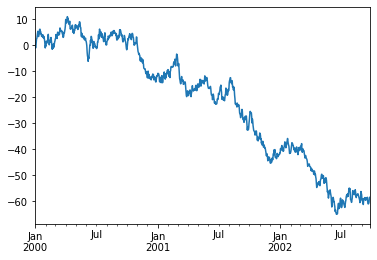

In [ ]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))

ts = ts.cumsum()

ts.plot();

In [ ]:
plt.show();

<Figure size 432x288 with 0 Axes>

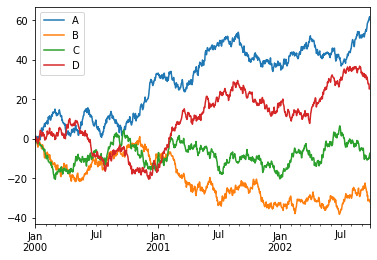

In [ ]:
df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)


df = df.cumsum()

plt.figure();

df.plot();

plt.legend(loc='best');

In [ ]:
df.to_csv("foo.csv")

In [ ]:
pd.read_csv("foo.csv")

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.594292,0.234862,1.004330,-1.364859
1,2000-01-02,1.179443,0.074588,0.071896,-0.219115
2,2000-01-03,1.332212,-1.211394,-1.417332,0.853754
3,2000-01-04,0.380254,-1.584277,-1.445672,0.717263
4,2000-01-05,-0.083562,-1.470960,-1.209692,0.578356
...,...,...,...,...,...
995,2002-09-22,59.664339,-30.962873,-9.807966,27.924818
996,2002-09-23,60.807338,-30.711035,-10.012973,27.263222
997,2002-09-24,61.390435,-31.480343,-8.494846,25.157344
998,2002-09-25,61.773939,-31.617808,-7.791943,25.448935


In [ ]:
df.to_hdf("foo.h5", "df")

In [ ]:
pd.read_hdf("foo.h5", "df")

,A,B,C,D
2000-01-01,-0.594292,0.234862,1.004330,-1.364859
2000-01-02,1.179443,0.074588,0.071896,-0.219115
2000-01-03,1.332212,-1.211394,-1.417332,0.853754
2000-01-04,0.380254,-1.584277,-1.445672,0.717263
2000-01-05,-0.083562,-1.470960,-1.209692,0.578356
...,...,...,...,...
2002-09-22,59.664339,-30.962873,-9.807966,27.924818
2002-09-23,60.807338,-30.711035,-10.012973,27.263222
2002-09-24,61.390435,-31.480343,-8.494846,25.157344
2002-09-25,61.773939,-31.617808,-7.791943,25.448935


In [ ]:
df.to_excel("foo.xlsx", sheet_name="Sheet1")

In [ ]:
pd.read_excel("foo.xlsx", "Sheet1", index_col=None, na_values=["NA"])

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.594292,0.234862,1.004330,-1.364859
1,2000-01-02,1.179443,0.074588,0.071896,-0.219115
2,2000-01-03,1.332212,-1.211394,-1.417332,0.853754
3,2000-01-04,0.380254,-1.584277,-1.445672,0.717263
4,2000-01-05,-0.083562,-1.470960,-1.209692,0.578356
...,...,...,...,...,...
995,2002-09-22,59.664339,-30.962873,-9.807966,27.924818
996,2002-09-23,60.807338,-30.711035,-10.012973,27.263222
997,2002-09-24,61.390435,-31.480343,-8.494846,25.157344
998,2002-09-25,61.773939,-31.617808,-7.791943,25.448935


## 갓차스

In [ ]:
if pd.Series([False, True, False]):
     print("I was true")

ValueError: ignored